In [111]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline
import warnings 
import utils
warnings.filterwarnings("ignore")

In [112]:
# load the dataset
store_data = pd.read_csv("heart_failure.csv")

In [113]:
# Analyze the dataset
store_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [114]:
store_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [115]:
# Analyze the dataset
store_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [116]:
store_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [117]:
# to describe the data
store_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [118]:
store_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [119]:
store_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

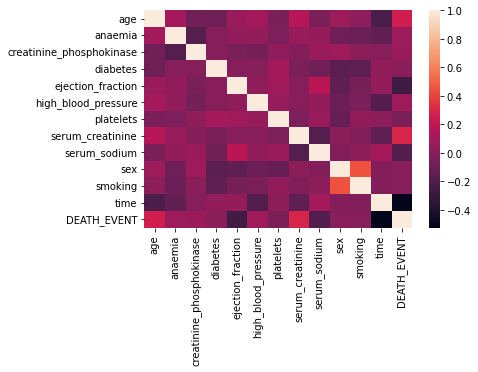

In [120]:
sns.heatmap(store_data.corr())

In [121]:
store_data_features = store_data[['ejection_fraction','serum_creatinine','DEATH_EVENT']]

In [122]:
store_data_features.shape

(299, 3)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

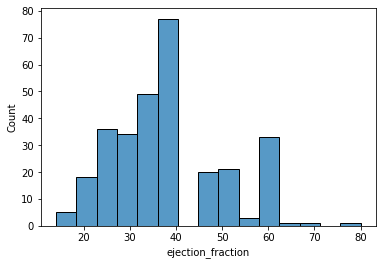

In [123]:
sns.histplot(store_data_features['ejection_fraction'])

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

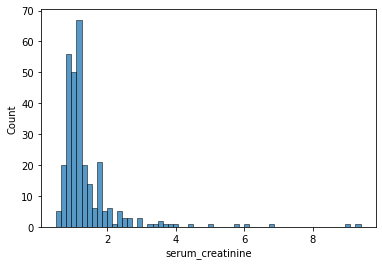

In [124]:
sns.histplot(store_data_features['serum_creatinine'])

In [125]:
store_data_features[store_data_features['DEATH_EVENT']==0].describe()

,ejection_fraction,serum_creatinine,DEATH_EVENT
count,203.000000,203.000000,203.0
mean,40.266010,1.184877,0.0
std,10.859963,0.654083,0.0
min,17.000000,0.500000,0.0
25%,35.000000,0.900000,0.0
50%,38.000000,1.000000,0.0
75%,45.000000,1.200000,0.0
max,80.000000,6.100000,0.0


<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

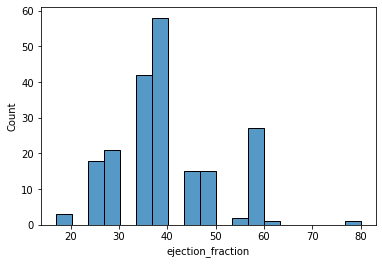

In [126]:
sns.histplot(store_data_features[store_data_features['DEATH_EVENT']==0]['ejection_fraction'])

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

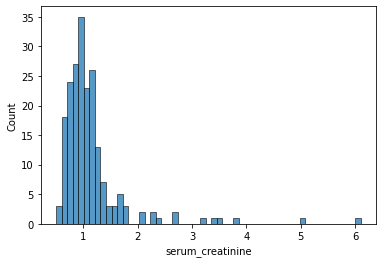

In [127]:
 sns.histplot(store_data_features[store_data_features['DEATH_EVENT']==0]['serum_creatinine'])

In [128]:
store_data_features[store_data_features['DEATH_EVENT']==1].describe()

,ejection_fraction,serum_creatinine,DEATH_EVENT
count,96.000000,96.000000,96.0
mean,33.468750,1.835833,1.0
std,12.525303,1.468562,0.0
min,14.000000,0.600000,1.0
25%,25.000000,1.075000,1.0
50%,30.000000,1.300000,1.0
75%,38.000000,1.900000,1.0
max,70.000000,9.400000,1.0


<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

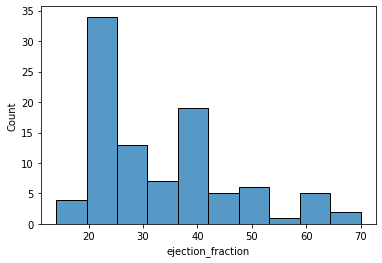

In [129]:
 sns.histplot(store_data_features[store_data_features['DEATH_EVENT']==1]['ejection_fraction'])

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

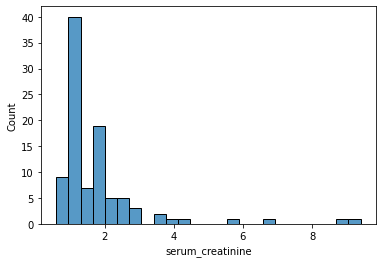

In [130]:
 sns.histplot(store_data_features[store_data_features['DEATH_EVENT']==1]['serum_creatinine'])

In [131]:
%pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

Note: you may need to restart the kernel to use updated packages.


In [132]:
basket_data = store_data_features.groupby(['DEATH_EVENT','ejection_fraction'])['serum_creatinine'].mean().unstack().\
                reset_index().fillna(0).set_index('DEATH_EVENT')
basket_data

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
DEATH_EVENT,,,,,,,,,,,,,,,,,
0,0.0,0.00,1.0,0.900000,1.638889,1.151429,1.194286,1.137200,1.01697,1.384,1.212000,0.9,1.080741,0.8,0.0,0.0,1.18
1,0.8,1.25,2.1,1.893125,1.318333,1.489231,2.528571,2.070667,2.27500,1.960,0.983333,1.9,1.175000,6.8,1.5,9.0,0.00


In [133]:
basket = store_data_features.groupby(['ejection_fraction','DEATH_EVENT'])['serum_creatinine'].mean().unstack().\
                reset_index().fillna(0).set_index('ejection_fraction')
basket

DEATH_EVENT,0,1
ejection_fraction,,
14,0.000000,0.800000
15,0.000000,1.250000
17,1.000000,2.100000
20,0.900000,1.893125
25,1.638889,1.318333
30,1.151429,1.489231
35,1.194286,2.528571
38,1.137200,2.070667
40,1.016970,2.275000


In [134]:
def hot_encode(x):
    if(x< 1):
        return 0
    if(x>=1):
        return 1
  
# Encoding the datasets
basket_encoded = basket_data.applymap(hot_encode)
basket_data = basket_encoded

In [135]:
basket_data

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
DEATH_EVENT,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1
1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0


In [ ]:
# Building the model
frq_items = apriori(basket_data, min_support = 0.05, use_colnames = True)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

## Using Logistic Regression with all features

In [ ]:
x= store_data.iloc[:,:-1]
y = store_data.iloc[:,-1:]

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0,stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)


In [ ]:
xtrain[:4]

In [ ]:
xtest[:4]

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

## Using Logistic Regression

In [ ]:
x=store_data_features.iloc[:,:-1]
y = store_data_features.iloc[:,-1:]

In [ ]:
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0,stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)


In [ ]:
xtrain[:4]

In [ ]:
xtest[:4]

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# import utils
associationRules =utils.extract(Rules)
rules_df = pd.dataframe(associationRules,colums=['LHS','RHS', 'Support', 'Lift',])
rules_df